<a href="https://colab.research.google.com/github/Fuad3004/Neural-Network-Multiclass-Classification/blob/main/sklearn_datasets_make_blobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Input

In [ ]:
import torch
import sklearn

from sklearn.datasets import make_blobs


# https://scikit-learn.org/0.15/modules/generated/sklearn.datasets.make_blobs.html

X,y =make_blobs(n_samples=1000,
                n_features=2,
                centers=4, #no of classes (y label)
                cluster_std=1.5,
                random_state=500)

len(X),len(y)

(1000, 1000)

In [ ]:
X[:5],y[:5]

(array([[-2.79859849, -2.5120065 ],
        [-9.66540152, -3.06451674],
        [ 1.76429476, -2.89357166],
        [ 4.40731934, -8.67133024],
        [ 3.45346181,  4.34649316]]),
 array([3, 2, 3, 0, 1]))

In [ ]:
import pandas as pd

blobs=pd.DataFrame({"Feature Data 1": X[:,0],
                      "Feature Data 2": X[:,1],
                      "Output Label":y})
blobs

,Feature Data 1,Feature Data 2,Output Label
0,-2.798598,-2.512006,3
1,-9.665402,-3.064517,2
2,1.764295,-2.893572,3
3,4.407319,-8.671330,0
4,3.453462,4.346493,1
...,...,...,...
995,4.479969,-8.565453,0
996,0.441367,-3.463739,3
997,-9.798086,-2.936744,2
998,0.000795,-5.089307,3


In [ ]:
blobs.head(10)

,Feature Data 1,Feature Data 2,Output Label
0,-2.798598,-2.512006,3
1,-9.665402,-3.064517,2
2,1.764295,-2.893572,3
3,4.407319,-8.671330,0
4,3.453462,4.346493,1
5,0.381017,-0.928377,3
6,-0.801386,-3.854191,3
7,3.576827,-9.095954,0
8,-7.969578,-3.928070,2
9,1.046879,-0.635256,3


#Convert Input Types to Tensor

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.LongTensor)

In [ ]:
X.dtype , y.dtype

(torch.float32, torch.int64)

In [ ]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [ ]:
X[:5],y[:5]

(tensor([[-2.7986, -2.5120],
         [-9.6654, -3.0645],
         [ 1.7643, -2.8936],
         [ 4.4073, -8.6713],
         [ 3.4535,  4.3465]]),
 tensor([3, 2, 3, 0, 1]))

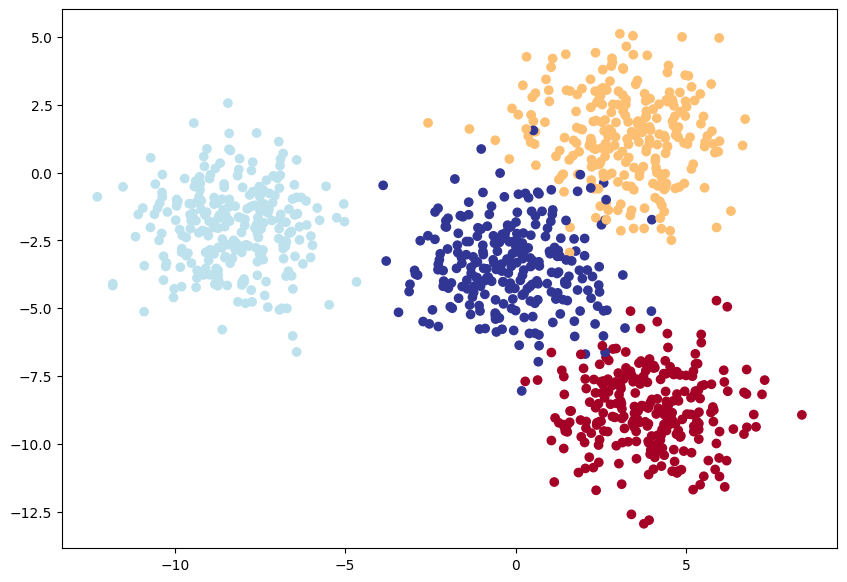

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap="RdYlBu");

#Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=500)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

#Build The Model


In [ ]:
# Making a device agnostic code

device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from torch import nn

class MakeBlobModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
      nn.Linear(in_features=2, out_features=10),
      # nn.ReLU() After running all code: our data can be linealy separable, that is why relu no important
      nn.Linear(in_features=10, out_features=10),
      # nn.ReLU()
      nn.Linear(in_features=10, out_features=4)
    )  

  def forward(self,x):
    return self.linear_layer_stack(x)

model_f_blob= MakeBlobModel().to(device)
print(model_f_blob)

NameError: ignored

#Train Model

In [ ]:
#creat Loss Function --->>>>>> optimizer  ------>>>>> Accuracy Function

loss_fn = nn.CrossEntropyLoss()

optimizer= torch.optim.SGD(model_f_blob.parameters(), lr=0.1)

def accuracy_fn(y_true, y_preds):

  total_correct=torch.eq(y_true, y_preds).sum().item()
  acc=(total_correct/len(y_preds))*100
  return acc

In [ ]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

X_train.device , y_train.device, X_test.device, y_test.device


(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

In [ ]:
!nvidia-smi

Sun Apr  2 13:33:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W /  70W |    573MiB / 15360MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
model_f_blob(X_train.to(device))[:5]

tensor([[-0.1519, -0.4420, -1.9951,  0.4248],
        [-0.3618,  0.3353,  0.6063, -0.0939],
        [-0.4400, -1.2148, -4.3100,  1.0455],
        [ 0.1222, -0.4123, -2.0502,  0.3455],
        [ 0.3865, -0.3108, -1.8700,  0.2162]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [ ]:
model_f_blob(X_train.to(device))[0].shape

torch.Size([4])

In [ ]:
y_logits=model_f_blob(X_test.to(device))
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.0503,  1.0206,  2.6285, -0.6561],
        [-0.5098, -0.8574, -3.1285,  0.8013],
        [-0.4367, -1.1046, -3.9594,  0.9650],
        [-0.0947, -0.3161, -1.6236,  0.3216],
        [-0.3063, -0.4961, -2.0839,  0.4966]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.0525, 0.1533, 0.7654, 0.0287],
        [0.1822, 0.1287, 0.0133, 0.6759],
        [0.1784, 0.0915, 0.0053, 0.7248],
        [0.2829, 0.2267, 0.0613, 0.4290],
        [0.2365, 0.1956, 0.0400, 0.5279]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [ ]:
torch.sum(y_pred_probs[0])

tensor(1.0000, device='cuda:0', grad_fn=<SumBackward0>)

In [ ]:
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.0525, 0.1533, 0.7654, 0.0287], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(2, device='cuda:0')


In [ ]:
torch.manual_seed(500)
torch.cuda.manual_seed(500)
epochs=1000

#put all data on target device


# --------->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Train the model <<<<<<<<<<<<<---------

for epoch in range(epochs):

  model_f_blob.eval()

  y_logits=model_f_blob(X_train)
  y_pred= torch.softmax(y_logits, dim=1).argmax(dim=1)


  loss=loss_fn(y_logits, y_train)
  
  acc= accuracy_fn(y_true = y_train,
                   y_preds = y_pred)
  
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

#--------->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Testing <<<<<<<<<<<<<<<<<<<<<------------ 

  model_f_blob.eval()
  
  with torch.inference_mode():

    test_logits = model_f_blob(X_test)
    test_pred=torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss=loss_fn(test_logits, y_test)

    test_acc= accuracy_fn(y_true = y_test,
                          y_preds=test_pred)
    
#--------->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Ending <<<<<<<<<<<<<<<<<<<<<------------ 

  if epoch % 100==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 2.30879, Accuracy: 41.62% | Test Loss: 1.14667, Test Accuracy: 49.00%
Epoch: 100 | Loss: 0.13539, Accuracy: 97.00% | Test Loss: 0.14212, Test Accuracy: 95.50%
Epoch: 200 | Loss: 0.09126, Accuracy: 97.25% | Test Loss: 0.09204, Test Accuracy: 98.50%
Epoch: 300 | Loss: 0.07707, Accuracy: 97.25% | Test Loss: 0.07384, Test Accuracy: 98.50%
Epoch: 400 | Loss: 0.07047, Accuracy: 97.38% | Test Loss: 0.06384, Test Accuracy: 98.50%
Epoch: 500 | Loss: 0.06665, Accuracy: 97.50% | Test Loss: 0.05801, Test Accuracy: 98.50%
Epoch: 600 | Loss: 0.06424, Accuracy: 97.50% | Test Loss: 0.05442, Test Accuracy: 98.50%
Epoch: 700 | Loss: 0.06263, Accuracy: 97.50% | Test Loss: 0.05206, Test Accuracy: 98.50%
Epoch: 800 | Loss: 0.06149, Accuracy: 97.50% | Test Loss: 0.05041, Test Accuracy: 98.50%
Epoch: 900 | Loss: 0.06064, Accuracy: 97.50% | Test Loss: 0.04920, Test Accuracy: 98.50%


#Make Predction 

In [ ]:
model_f_blob.eval()
with torch.inference_mode():
    y_logits = model_f_blob(X_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ -1.9817,  17.1087, -18.6533,   6.3392],
        [-15.1552,  -5.4949,  10.9922,   6.7641],
        [-12.0922, -10.0937,  11.1571,   6.5167],
        [ -1.2098,  -2.4133,  -5.4601,   5.9998],
        [ -8.4869,  -2.5450,   2.0678,   6.4209],
        [ 12.3843,  -4.7891, -17.6450,   5.1737],
        [ 10.8309,  -6.0475, -15.1569,   5.2450],
        [ 20.1516,  -6.6646, -24.2362,   4.6938],
        [-18.9371, -13.3997,  20.5170,   6.8647],
        [-13.2440,  17.8750,  -7.6977,   7.0055]], device='cuda:0')

In [ ]:
 # Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_pred = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_pred[:10]}\nLabels: {y_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_test, y_preds=y_pred)}%")

Predictions: tensor([1, 2, 2, 3, 3, 0, 0, 0, 2, 1], device='cuda:0')
Labels: tensor([1, 2, 2, 3, 3, 0, 0, 0, 2, 1], device='cuda:0')
Test accuracy: 98.5%


#visualize

In [ ]:
import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.
    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
  # """
  # Plots linear training data and test data and compares predictions.
  # """
      plt.figure(figsize=(10, 7))

      # Plot training data in blue
      plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

      # Plot test data in green
      plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

      if predictions is not None:
          # Plot the predictions in red (predictions were made on the test data)
          plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

      # Show the legend
      plt.legend(prop={"size": 14})

  

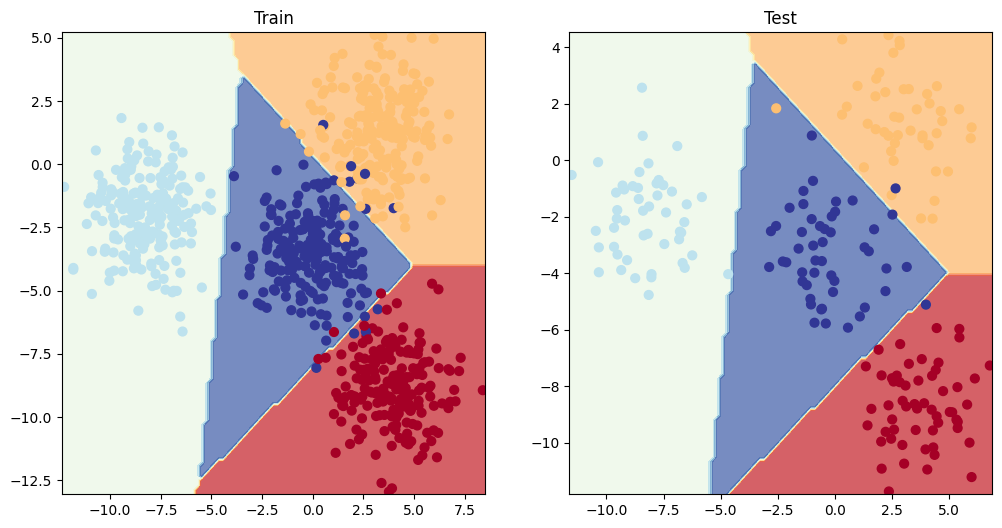

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_f_blob, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_f_blob, X_test, y_test)


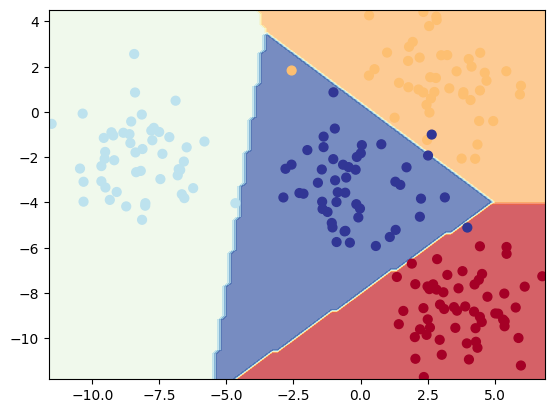

In [ ]:
plot_decision_boundary(model_f_blob, X_test, y_test)